In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl

In [2]:
df=pd.read_csv("E:/Dataset/IPL.csv")
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
remove_columns=['striker', 'non-striker', 'mid', 'batsman', 'bowler']
df.drop(labels=remove_columns, axis=1)

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...,...,...
76009,5/21/2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,129
76010,5/21/2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,129
76011,5/21/2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,129
76012,5/21/2017,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,129


In [4]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [5]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [6]:
df['count']=1
df.groupby(['venue']).count()['count']

venue
Barabati Stadium                                         856
Brabourne Stadium                                       1380
Buffalo Park                                             380
De Beers Diamond Oval                                    368
Dr DY Patil Sports Academy                              2088
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     1113
Dubai International Cricket Stadium                      868
Eden Gardens                                            7049
Feroz Shah Kotla                                        7068
Green Park                                               492
Himachal Pradesh Cricket Association Stadium            1115
Holkar Cricket Stadium                                   617
JSCA International Stadium Complex                       837
Kingsmead                                               1731
M Chinnaswamy Stadium                                   7443
MA Chidambaram Stadium, Chepauk                         5972
Maharashtra Cricke

In [7]:
current_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', 'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Sunrisers Hyderabad']

In [8]:
current_venues = ['M Chinnaswamy Stadium','Eden Gardens', 'Feroz Shah Kotla', 'MA Chidambaram Stadium, Chepauk', 'Punjab Cricket Association Stadium, Mohali', 'Wankhede Stadium', 'Sawai Mansingh Stadium', 'Rajiv Gandhi International Stadium, Uppal']

In [9]:
df=df[(df['bat_team'].isin(current_teams)) &(df['bowl_team'].isin(current_teams))]

In [10]:
df=df[(df['venue'].isin(current_venues))]
df=df[df['overs']>=5.0]

In [11]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
final_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team', 'venue'])

In [12]:
final_df = final_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad', 'venue_Eden Gardens', 'venue_Feroz Shah Kotla','venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk','venue_Sawai Mansingh Stadium', 'venue_Punjab Cricket Association Stadium, Mohali', 'venue_Rajiv Gandhi International Stadium, Uppal', 'venue_Wankhede Stadium', 'overs','runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]
final_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,venue_Sawai Mansingh Stadium,"venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.5,61,1,58,1,222


In [13]:
X_train = final_df.drop(labels='total', axis=1)[final_df['date'].dt.year<=2016]
X_test = final_df.drop(labels='total', axis=1)[final_df['date'].dt.year>=2017]

In [14]:
X_train

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,"venue_MA Chidambaram Stadium, Chepauk",venue_Sawai Mansingh Stadium,"venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,5.1,61,0,59,0
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,5.2,61,1,59,1
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,5.3,61,1,59,1
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,5.4,61,1,59,1
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,5.5,61,1,58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,19.2,194,7,54,4
68858,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,19.3,200,7,56,4
68859,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,19.4,201,7,56,4
68860,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,19.5,202,7,57,4


In [15]:
X_test

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,"venue_MA Chidambaram Stadium, Chepauk",venue_Sawai Mansingh Stadium,"venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5
68894,2017-04-05,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,5.1,46,1,42,1
68895,2017-04-05,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,5.2,50,1,46,1
68896,2017-04-05,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,5.3,50,1,44,1
68897,2017-04-05,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,5.4,54,1,48,1
68898,2017-04-05,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,5.5,58,1,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,18.1,106,9,29,4
75885,2017-05-19,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,18.2,107,9,29,4
75886,2017-05-19,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,18.3,107,9,28,4
75887,2017-05-19,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,18.4,107,9,24,4


In [16]:
y_train = final_df[final_df['date'].dt.year<=2016]['total'].values
y_test = final_df[final_df['date'].dt.year>=2017]['total'].values

In [17]:
y_train

array([222, 222, 222, ..., 208, 208, 208], dtype=int64)

In [18]:
y_test

array([207, 207, 207, ..., 107, 107, 107], dtype=int64)

In [19]:
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [20]:
X_train

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,"venue_MA Chidambaram Stadium, Chepauk",venue_Sawai Mansingh Stadium,"venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5
32,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,5.1,61,0,59,0
33,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,5.2,61,1,59,1
34,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,5.3,61,1,59,1
35,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,5.4,61,1,59,1
36,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,5.5,61,1,58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,19.2,194,7,54,4
68858,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,19.3,200,7,56,4
68859,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,19.4,201,7,56,4
68860,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,19.5,202,7,57,4


In [21]:
X_test

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,"venue_MA Chidambaram Stadium, Chepauk",venue_Sawai Mansingh Stadium,"venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5
68894,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.1,46,1,42,1
68895,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.2,50,1,46,1
68896,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.3,50,1,44,1
68897,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.4,54,1,48,1
68898,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.5,58,1,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,18.1,106,9,29,4
75885,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,18.2,107,9,29,4
75886,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,18.3,107,9,28,4
75887,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,18.4,107,9,24,4


In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [23]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [24]:
lasso_regressor.fit(X_train,y_train)

C:\Users\Criminal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3036368.9464101694, tolerance: 1783.1092408446723
  model = cd_fast.enet_coordinate_descent(
C:\Users\Criminal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3048008.4219311145, tolerance: 1848.9269634785549
  model = cd_fast.enet_coordinate_descent(
C:\Users\Criminal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3401585.947275168, tolerance: 2045.141831793981
  model = cd_fast.enet_coordinate_descent(
C:\Users\Criminal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: C

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [25]:
print(lasso_regressor.best_params_)

{'alpha': 1}


In [26]:
print(lasso_regressor.best_score_)

-343.1309689444175


In [27]:
prediction = lasso_regressor.predict(X_test)

In [32]:
print(lasso_regressor.best_score_(prediction, y_test))

TypeError: 'numpy.float64' object is not callable

In [25]:
import sklearn.metrics as metrics

C:\Users\Criminal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


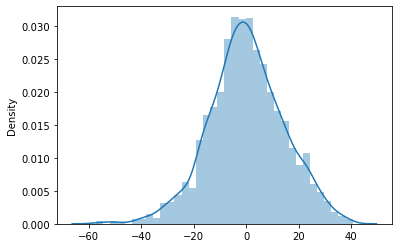

In [26]:
print(sns.distplot(y_test-prediction))

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))

MAE: 11.11995524892091


In [28]:
print('MSE:',metrics.mean_squared_error(y_test, prediction))

MSE: 203.82449147580922


In [29]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

RMSE: 14.276711507760085


In [30]:
with open('Lasso.pkl', 'wb') as f:
    pkl.dump(lasso_regressor, f)

In [31]:
with open('IPL.pkl', 'wb') as f:
    pkl.dump(lasso_regressor, f)

In [32]:
with open('IPL_Score.pkl', 'wb') as f:
    pkl.dump(lasso_regressor, f)